# Modelo predictivo aplicando técnicas de Agrupamiento Jerárquico utilizando lenguaje Python para resolver un problema de clusterización

In [1]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [6]:
#Loading data
data = pd.read_csv("clientes.csv")
df = pd.DataFrame(data)
print('Dimensiones del df:', df.shape)

# Information on DF types and nulls
df.drop_duplicates(inplace = True)
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'tipo de la columna'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'campos nulos (cant)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.
                         rename(index={0:'campos nulos (%)'}))
display(tab_info)

display(df[:5])
print(df.describe())
print(df.info())
#Records by category
print(df.groupby('categoria').size())


Dimensiones del df: (140, 8)


C:\Users\hp\AppData\Local\Temp\ipykernel_12116\2315493803.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'campos nulos (cant)'}))
C:\Users\hp\AppData\Local\Temp\ipykernel_12116\2315493803.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.


,usuario,op,co,ex,ag,ne,wordcount,categoria
tipo de la columna,object,float64,float64,float64,float64,float64,float64,int64
campos nulos (cant),0,0,0,0,0,0,0,0
campos nulos (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


               op          co          ex          ag          ne   wordcount  \
count  140.000000  140.000000  140.000000  140.000000  140.000000  140.000000   
mean    44.414591   22.977135   40.764428   22.918528    8.000098   98.715484   
std      8.425723    5.816851    7.185246    7.657122    3.039248   44.714071   
min     30.020465    7.852756   18.693542    9.305985    1.030213    5.020800   
25%     38.206484   19.740299   36.095722   17.050993    6.086144   66.218475   
50%     44.507091   22.466718   41.457492   21.384554    7.839722   94.711400   
75%     49.365923   26.091606   45.197769   28.678866    9.758189  119.707925   
max     71.696129   49.637863   59.824844   40.583162   23.978462  217.183200   

        categoria  
count  140.000000  
mean     4.050000  
std      2.658839  
min      1.000000  
25%      2.000000  
50%      3.500000  
75%      7.000000  
max      9.000000  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 139
Data columns (tota

(140, 5)

In [8]:
#First we define the inputs
X = np.array(df[["op","co","ex","ag","wordcount"]])
X = np.delete(X, (0), axis=0)

#X.shape
X

array([[ 44.986842,  20.525865,  37.938947,  24.279098,  78.797   ],
       [ 41.733854,  13.745417,  38.999896,  34.645521,  49.2604  ],
       [ 40.377154,  15.377462,  52.337538,  31.082154,  80.4538  ],
       [ 36.664677,  19.642258,  48.530806,  31.138871,  47.0645  ],
       [ 33.531771,  16.183958,  43.211667,  25.786667,  40.1354  ],
       [ 31.851102,  13.735591,  47.182362,  19.594331,  91.5197  ],
       [ 31.865118,  16.58811 ,  55.377559,  36.258346,  66.2835  ],
       [ 46.393488,  25.451163,  39.93031 ,  16.658062, 145.1473  ],
       [ 39.436667,  26.135303,  32.966288,  32.291591, 177.5606  ],
       [ 52.750992,  24.706565,  41.698855,  17.057176,  97.2901  ],
       [ 41.328182,  20.241212,  39.173333,  21.070505,  32.8788  ],
       [ 54.407727,  26.992121,  34.104318,  18.771818, 125.3409  ],
       [ 47.610076,  20.343788,  39.439545,  21.438409, 128.8561  ],
       [ 39.435149,  20.091791,  41.479403,  21.004104, 178.1866  ],
       [ 48.617348,  21.165758,  4

In [11]:
# Supongamos que tenemos un conjunto de datos X y queremos aplicar el Agrupamiento Jerárquico con k = 3
k = 3
clustering = AgglomerativeClustering(n_clusters=k)
labels = clustering.fit_predict(X)

# Calculamos el índice silhouette
silhouette_avg = silhouette_score(X, labels)
print("Índice silhouette promedio:", silhouette_avg)

Índice silhouette promedio: 0.45394882299496436


A medida que k disminuye el Índice silhouette promedio aumenta por lo que logra hacer una mejor clasificacion. 

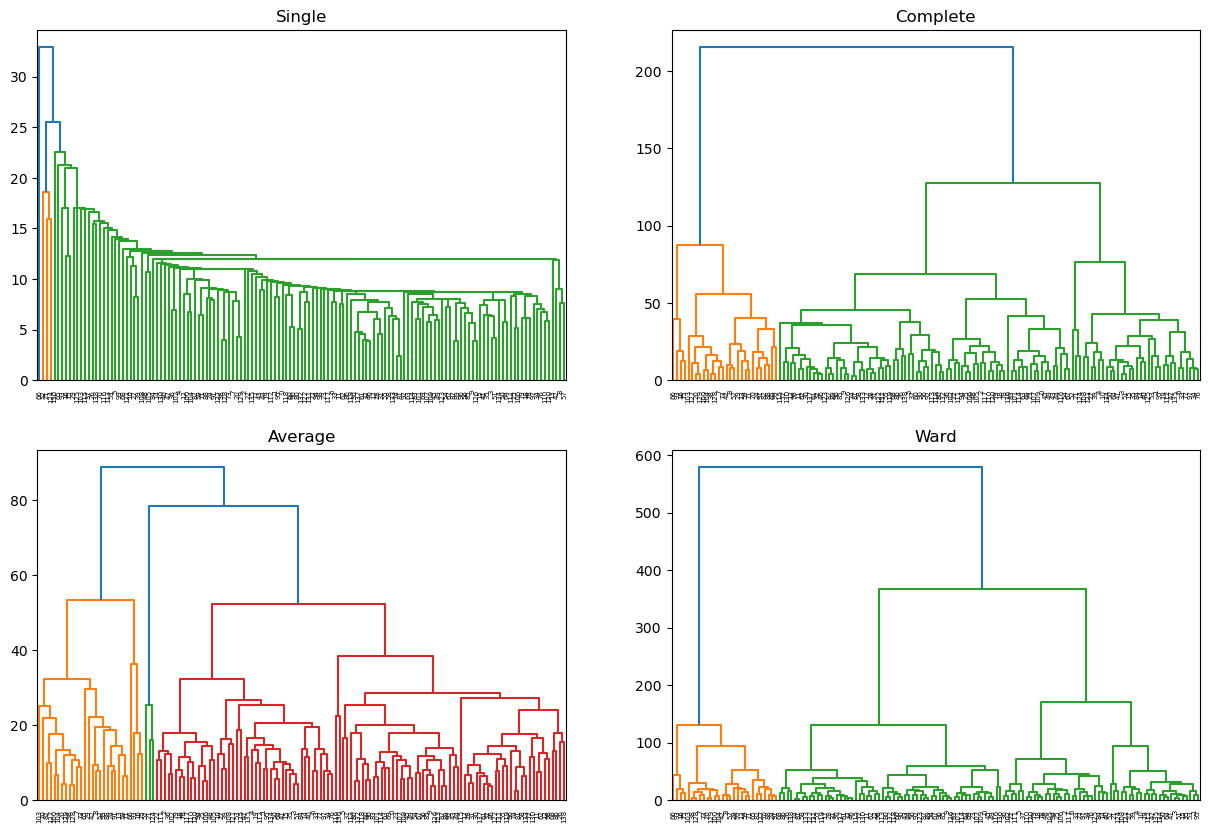

In [12]:
# AgglomerativeClustering has the options to calculate the distance between groups include: 
# quarter
# complete
# average
# unique
# ward
from scipy.cluster.hierarchy import dendrogram,linkage

Z1 = linkage(X, method='single', metric='euclidean')
Z2 = linkage(X, method='complete',metric='euclidean')
Z3 = linkage(X, method='average',metric='euclidean')
Z4 = linkage(X, method='ward', metric='euclidean')

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1), dendrogram(Z1),
plt.title('Single')
plt.subplot(2,2,2), dendrogram(Z2),
plt.title('Complete')
plt.subplot(2,2,3), dendrogram(Z3),
plt.title('Average')
plt.subplot(2,2,4), dendrogram(Z4), plt.title('Ward')
plt.show()